In [112]:
import pandas as pd
import numpy as np


In [113]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [114]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [115]:
df.shape

(5572, 5)

In [116]:
# Data clearning
# EDA
# Text Preprocessing
# Evaluation
# Improvement
# Website
# Deploy


In [117]:
# Data clearning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [119]:
df.drop(columns =['Unnamed: 2',	'Unnamed: 3'	,'Unnamed: 4'], inplace = True)

In [120]:
df.sample(5)

,v1,v2
194,ham,How are you doing? Hope you've settled in for ...
721,ham,S'fine. Anytime. All the best with it.
418,ham,"Alright, I'll head out in a few minutes, text ..."
3958,ham,Have a nice day my dear.
2373,spam,XMAS Prize draws! We are trying to contact U. ...


In [121]:
df.rename(columns = {'v1': 'target','v2' : 'text'}, inplace= True)

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
encoder = LabelEncoder()

In [124]:
df['target'] = encoder.fit_transform(df['target'])

In [125]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [127]:
df.duplicated().sum()

403

In [128]:
df = df.drop_duplicates(keep = 'first')

In [129]:
df.shape

(5169, 2)

In [130]:
# EDA

In [131]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

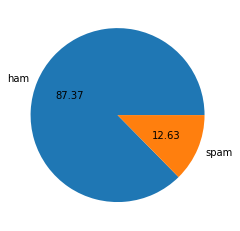

In [132]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [133]:
#data is imbalanced

In [134]:
!pip install nltk

In [135]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [137]:
df['nums_characters'] = df['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
 df['nums_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
 df['nums_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df.head()

,target,text,nums_characters,nums_word,nums_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [141]:
df[['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [142]:
df[df['target']== 0][['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [143]:
df[df['target']== 1][['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [144]:
import seaborn as sns

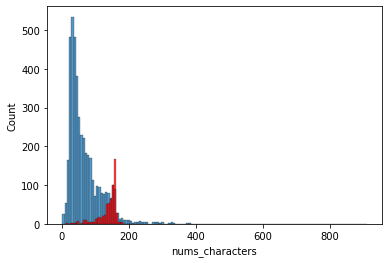

In [145]:
sns.histplot(df[df['target'] == 0]['nums_characters'])
sns.histplot(df[df['target'] == 1]['nums_characters'],color = 'red')
plt.show()


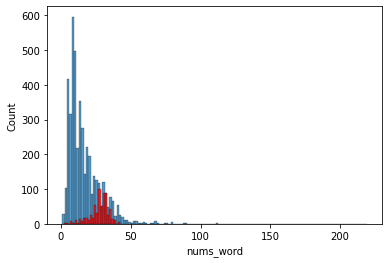

In [146]:
sns.histplot(df[df['target'] == 0]['nums_word'])
sns.histplot(df[df['target'] == 1]['nums_word'],color = 'red')
plt.show()

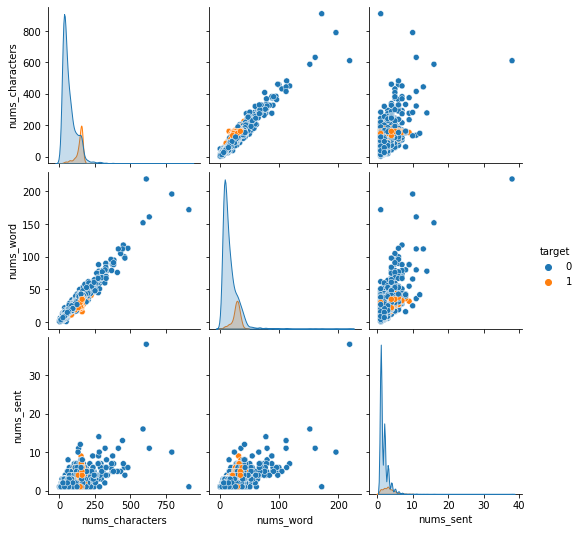

In [147]:
sns.pairplot(df,hue = 'target')

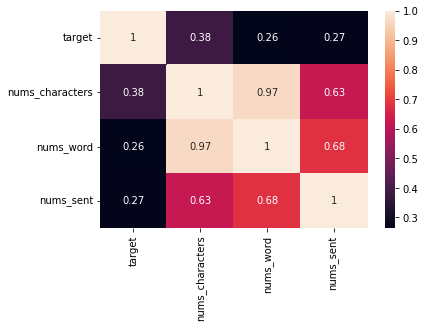

In [148]:
sns.heatmap(df.corr(),annot= True)

In [149]:
#data preprocessing

In [150]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  Y = []
  for i in text:
    if i.isalnum():
      Y.append(i)

  text = Y[:]
  Y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      Y.append(i)

  text = Y[:]
  Y.clear()
  for i in text:
    Y.append(ps.stem(i))    

  return " ".join(Y)

In [151]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [152]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [153]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [154]:
transform_text('I loved making Project on machine learning ')

'love make project machin learn'

In [155]:
df['transform_text'] = df['text'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
df.head()

,target,text,nums_characters,nums_word,nums_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [157]:
from wordcloud import WordCloud

In [158]:
wc = WordCloud(width = 500,height= 500,min_font_size=10,background_color= 'white' )

In [159]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

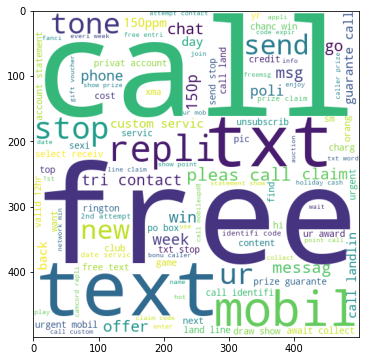

In [160]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


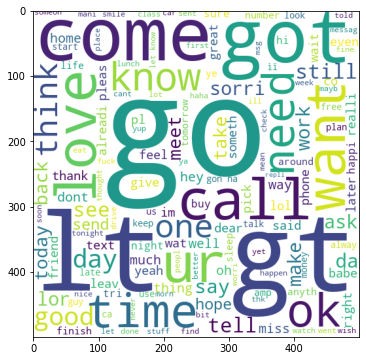

In [161]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [164]:
spam_corpas = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpas.append(word)


In [166]:
len(spam_corpas)

9883

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

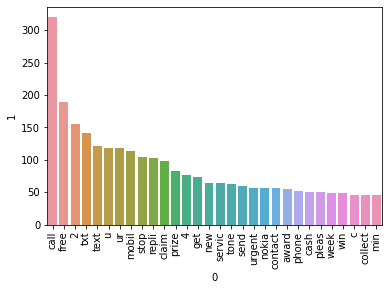

In [172]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpas).most_common(30))[0],pd.DataFrame(Counter(spam_corpas).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [174]:
han_corpas = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
  for word in msg.split():
    han_corpas.append(word)

In [176]:
len(han_corpas)


34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

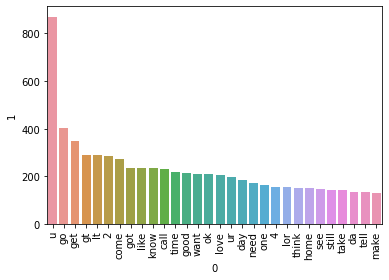

In [180]:

sns.barplot(pd.DataFrame(Counter(han_corpas).most_common(30))[0],pd.DataFrame(Counter(han_corpas).most_common(30))[1])
plt.xticks(rotation= 'vertical')

In [ ]:
#MODEL BUILDING

In [202]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [204]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [205]:
X.shape

(5169, 6629)

In [206]:
y = df['target'].values

In [207]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [210]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [211]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [212]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [213]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [214]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158
